In [1]:
import csv
import os
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import random
from scipy.stats import truncnorm
from scipy.optimize import fsolve
from scipy.optimize import minimize
import math
from scipy.stats import norm
from statistics import NormalDist
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.integrate import tplquad
from itertools import product

In [2]:
pwd

'/Users/iankim/Desktop/qv/project1/Aug2023_design1/setting_original'

In [3]:
df_master = pd.read_csv("MC_master_data.csv")

In [4]:
df_master

,Unnamed: 0,market_num,x_1,x_2,w_1,w_2,xi_1,xi_2,omega_1,omega_2,duo_pi_1,duo_pi_2,job_array_num
0,0,1,2.466700,2.723494,1.900984,1.030376,0.347543,0.263340,-0.05,-0.05,0.890922,1.469013,1
1,1,2,2.236563,2.813799,1.419854,1.672525,-0.715825,0.590300,0.35,0.35,0.334577,1.512403,2
2,2,3,2.301129,2.978665,1.313743,1.120636,0.500341,0.378281,-0.05,0.35,1.088840,1.314081,3
3,3,4,2.615969,2.201972,1.481308,1.545065,-0.707618,0.230801,0.35,-0.05,0.479714,1.161924,4
4,4,5,2.127139,2.371609,1.896420,1.756870,0.219672,0.000009,0.35,0.35,0.604937,0.693983,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,23997,23998,2.102676,2.648086,1.166065,1.249979,0.451944,-0.334786,-0.05,-0.05,1.151923,0.909216,23996
23996,23998,23999,2.623657,2.052207,1.249740,1.161546,0.150740,-0.071609,0.35,-0.05,1.049847,0.794793,23997
23997,23999,24000,2.936939,2.413279,1.969782,1.380366,-0.180843,0.160432,0.35,0.35,0.701113,0.919446,23998
23998,24000,24001,2.473048,2.987573,1.079595,1.976286,1.044170,-0.540951,0.35,-0.05,1.697194,0.661800,23999


In [5]:
path_0731 = './result/'
path_0731_list = os.listdir(path_0731)
len(path_0731_list)

24000

In [6]:
def data_read(path):
    file_list = os.listdir(path)

    job_num_list = []
    xi_1_star_list = []
    xi_2_star_list = []

    for i in file_list:
        file_name = path + i
        f = open(file_name, 'r', encoding='utf-8')
        rdr = csv.reader(f, delimiter='\t')
        r = list(rdr)

        job_num_list.append(int(r[0][0]))
        xi_1_star_list.append(float(r[0][1]))
        xi_2_star_list.append(float(r[0][2]))
    
    df_return = df({"job_num": job_num_list, "xi_1_star": xi_1_star_list, "xi_2_star": xi_2_star_list})

    return df_return

In [7]:
df_xi_star = data_read(path_0731)

In [8]:
print(df_xi_star.shape)
df_xi_star = df_xi_star.loc[df_xi_star['xi_1_star'] != 100]
print(df_xi_star.shape)

(24000, 3)
(23798, 3)


In [9]:
df_master = pd.merge(df_master, df_xi_star, left_on="job_array_num", right_on='job_num')

In [10]:
df_master

,Unnamed: 0,market_num,x_1,x_2,w_1,w_2,xi_1,xi_2,omega_1,omega_2,duo_pi_1,duo_pi_2,job_array_num,job_num,xi_1_star,xi_2_star
0,0,1,2.466700,2.723494,1.900984,1.030376,0.347543,0.263340,-0.05,-0.05,0.890922,1.469013,1,1,-0.320119,-1.000000
1,1,2,2.236563,2.813799,1.419854,1.672525,-0.715825,0.590300,0.35,0.35,0.334577,1.512403,2,2,-0.543807,-0.996644
2,2,3,2.301129,2.978665,1.313743,1.120636,0.500341,0.378281,-0.05,0.35,1.088840,1.314081,3,3,-0.408861,-1.000000
3,3,4,2.615969,2.201972,1.481308,1.545065,-0.707618,0.230801,0.35,-0.05,0.479714,1.161924,4,4,-0.922673,-0.427045
4,4,5,2.127139,2.371609,1.896420,1.756870,0.219672,0.000009,0.35,0.35,0.604937,0.693983,5,5,-0.169464,-0.518402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,23997,23998,2.102676,2.648086,1.166065,1.249979,0.451944,-0.334786,-0.05,-0.05,1.151923,0.909216,23996,23996,-0.505765,-1.000000
23794,23998,23999,2.623657,2.052207,1.249740,1.161546,0.150740,-0.071609,0.35,-0.05,1.049847,0.794793,23997,23997,-1.000000,-0.447437
23795,23999,24000,2.936939,2.413279,1.969782,1.380366,-0.180843,0.160432,0.35,0.35,0.701113,0.919446,23998,23998,-0.901699,-0.742089
23796,24000,24001,2.473048,2.987573,1.079595,1.976286,1.044170,-0.540951,0.35,-0.05,1.697194,0.661800,23999,23999,-0.968184,-0.891549


In [11]:
# define predetermined values
market_num = 25000
epsilon = 0.0000000001

# define parameters
# kappa_1 = 1
# kappa_2 = 1
kappa_1 = 0.5
kappa_2 = 0.5
alpha = 0.5
beta = 1
gamma = 0.5

# define mu of xi's 
mu_xi_1 = 0.1
mu_xi_2 = 0

sigma_xi_1 = 0.5
sigma_xi_2 = 0.5

In [12]:
def monopoly(x, w, xi, omega):
    mc = np.exp(gamma*w + omega)
    T = np.exp(beta*x - alpha*mc + xi)

    #(1) find Y
    def monopoly_eqn(var):
        Y = var
        eq = 1 - Y + T*np.exp(-Y)
        return eq
    Y = fsolve(monopoly_eqn, 1)[0]
    
    pi = (1/alpha)*(Y-1) 
    price = Y/alpha + mc
    share = pi/(price-mc)

    return pi, price, share
vec_monopoly = np.vectorize(monopoly)

def duopoly(x_1, x_2, w_1, w_2, xi_1, xi_2, omega_1, omega_2):
    try:
        mc_1 = np.exp(gamma*w_1 + omega_1) 
        mc_2 = np.exp(gamma*w_2 + omega_2)
        T_1 = np.exp(beta*x_1 - alpha*mc_1 + xi_1)
        T_2 = np.exp(beta*x_2 - alpha*mc_2 + xi_2)
        
        def duopoly_fun(Y):
            Y_1, Y_2 = Y
            eqn1 = Y_1 - math.log(T_1*(Y_2-1)) + math.log(1-Y_2+T_2*np.exp(-Y_2))        
            return abs(eqn1)
        
        def c1(Y):
            'Y_1 exp term greater than 0'
            Y_1, Y_2 = Y
            return 1-Y_1+T_1*np.exp(-Y_1)

        def c2(Y):
            'Y_2 exp term greater than 0'
            Y_1, Y_2 = Y 
            return 1-Y_2+T_2*np.exp(-Y_2)
        
        def c3(Y):
            Y_1, Y_2 = Y
            return Y_2 - math.log(T_2*(Y_1-1)) + math.log(1-Y_1+T_1*np.exp(-Y_1))

        bnds = ((1.000001, None), (1.000001, None))
        cons = ({'type': 'ineq', 'fun': c1}, 
                {'type': 'ineq', 'fun': c2},
                {'type': 'eq', 'fun': c3})
        initial_point = (1.0001, 1.0001)
        res = minimize(duopoly_fun, initial_point, method = 'SLSQP', bounds=bnds, constraints=cons)
        Y_1 = res.x[0]
        Y_2 = res.x[1]
        
        pi_1 = (1/alpha)*(Y_1-1)
        pi_2 = (1/alpha)*(Y_2-1)

        price_1 = Y_1/alpha + mc_1
        price_2 = Y_2/alpha + mc_2

        share_1 = pi_1/(price_1 - mc_1)
        share_2 = pi_2/(price_2 - mc_2)

        return pi_1, pi_2, price_1, price_2, share_1, share_2
    
    except:
        return 100, 100, 100, 100, 100, 100

vec_duopoly = np.vectorize(duopoly)

In [13]:
df_master['MS'] = (df_master['xi_1'].values >= df_master['xi_1_star'].values).astype(int) + 2*(df_master['xi_2'].values >= df_master['xi_2_star'].values).astype(int)

In [14]:
import matplotlib.pyplot as plt

(array([  168.,     0.,     0.,  2574.,     0.,     0.,  1821.,     0.,
            0., 19235.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

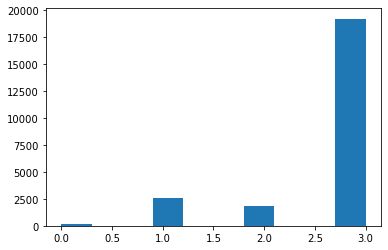

In [15]:
plt.hist(df_master['MS'])
# kappa value를 좀 낮춰줘야함

(array([8560., 2475., 2551., 2683., 2487., 2062., 1605., 1013.,  340.,
          22.]),
 array([-1.       , -0.8869265, -0.773853 , -0.6607795, -0.547706 ,
        -0.4346325, -0.321559 , -0.2084855, -0.095412 ,  0.0176615,
         0.130735 ]),
 <BarContainer object of 10 artists>)

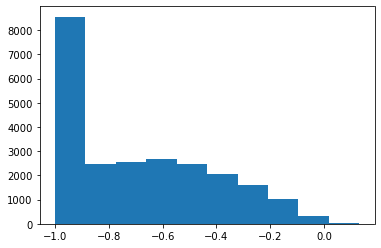

In [16]:
plt.hist(df_master['xi_2_star'])

In [17]:
df_master_ms0 = df_master.loc[df_master['MS']==0]
df_master_ms1 = df_master.loc[df_master['MS']==1]
df_master_ms2 = df_master.loc[df_master['MS']==2]
df_master_ms3 = df_master.loc[df_master['MS']==3]

In [18]:
df_master_ms0['price_1'] = 100
df_master_ms0['price_2'] = 100
df_master_ms0['share_1'] = 100
df_master_ms0['share_2'] = 100

f1_temp = vec_monopoly(df_master_ms1['x_1'].values, df_master_ms1['w_1'].values, df_master_ms1['xi_1'].values, df_master_ms1['omega_1'].values)
df_master_ms1['price_1'] = f1_temp[1]
df_master_ms1['price_2'] = 100
df_master_ms1['share_1'] = f1_temp[2]
df_master_ms1['share_2'] = 100

f2_temp = vec_monopoly(df_master_ms2['x_2'].values, df_master_ms2['w_2'].values, df_master_ms2['xi_2'].values, df_master_ms2['omega_2'].values)
df_master_ms2['price_1'] = 100
df_master_ms2['price_2'] = f2_temp[1]
df_master_ms2['share_1'] = 100
df_master_ms2['share_2'] = f2_temp[2]

f1f2_temp = vec_duopoly(df_master_ms3['x_1'].values, df_master_ms3['x_2'].values, df_master_ms3['w_1'].values, df_master_ms3['w_2'].values, df_master_ms3['xi_1'].values, df_master_ms3['xi_2'].values, df_master_ms3['omega_1'].values, df_master_ms3['omega_2'].values)
df_master_ms3['price_1'] = f1f2_temp[2]
df_master_ms3['price_2'] = f1f2_temp[3]
df_master_ms3['share_1'] = f1f2_temp[4]
df_master_ms3['share_2'] = f1f2_temp[5]

/var/folders/_m/gh9mkkld0rl0y75bn83mfm980000gn/T/ipykernel_79013/2302084845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master_ms0['price_1'] = 100
/var/folders/_m/gh9mkkld0rl0y75bn83mfm980000gn/T/ipykernel_79013/2302084845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master_ms0['price_2'] = 100
/var/folders/_m/gh9mkkld0rl0y75bn83mfm980000gn/T/ipykernel_79013/2302084845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [19]:
df_master_ms3 = df_master_ms3.loc[df_master_ms3['price_1'] != 100]

In [20]:
df_final = df_master_ms0.copy()
df_final = df_final.append(df_master_ms1)
df_final = df_final.append(df_master_ms2)
df_final = df_final.append(df_master_ms3)

In [21]:
df_final.to_csv("df_final.csv")

# shuffle and make mc data

In [22]:
df_final_shuffled = df_final.sample(frac = 1)

In [23]:
df_final_shuffled['mc_num'] = range(1, df_final_shuffled.shape[0]+1)

In [24]:
df_final_shuffled.to_csv("df_final_shuffled.csv")